In [1]:
%matplotlib notebook
from scripts.open_spec import *
from scripts.map_tool import *
from scripts.xas_process import XASProcess
from scripts.map_binned import *

file_directory = get_abs_path("data/map_example.dat")

temp = get_diff_scan(file_directory)

File is at:  C:\Users\hanr\GitHub\SGMPy\data/map_example.dat
C Scan:  [] 

A Scan:  [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 

C Mesh Scan:  [1, 2, 3, 4, 34, 35, 36, 39] 

Mesh Scan:  [5, 6, 23, 37, 38, 40] 



In [2]:
open_one_cmesh = OpenSingleCMesh()
open_one_cmesh.open_sgm_map(file_directory, scan_num = 23)

single_map = SingleMap(open_one_cmesh)
single_map.calculate_pfy(enStart = 75, enStop = 90)

Opening scan 23
in C:\Users\hanr\GitHub\SGMPy\data/map_example.dat
Parsing MCAs
Done!
2601
2601


In [3]:
x_energy_array = single_map.get_hex_x()
y_energy_array = single_map.get_hex_y()
print max(single_map.get_hex_x())
print min(single_map.get_hex_x())
print max(single_map.get_hex_y())
print min(single_map.get_hex_y())

1.8001599
1.2993523
2.9001093
2.3998676


In [4]:
x_edges_array, y_edges_array, mean_energy_array = create_grid(1.29, 1.81, 50, 2.39, 2.91, 50)

Start creating grids


In [5]:
x_bin_num = 50
y_bin_num = 50
x_bin_width = x_edges_array[1] - x_edges_array[0]
y_bin_width = y_edges_array[1] - y_edges_array[0]
grid_array = [[[] for j in range (y_bin_num)] for i in range(x_bin_num)]

for datapoint_index in range (0, len(x_energy_array) ):
    #print "datapoint_index", datapoint_index
    if x_energy_array[datapoint_index] <= x_edges_array[-1] and y_energy_array[datapoint_index] <= y_edges_array[-1]:
        #print "in if branch"
        x = x_energy_array[datapoint_index] - x_edges_array[0]
        #print "x", x
        #print "bin_width", x_bin_width
        #print "x / bin_width", x / x_bin_width
        x_bin_assigned = int(x / x_bin_width)+1
        #print x_bin_assigned

        y = y_energy_array[datapoint_index] - y_edges_array[0]
        #print "y", y
        #print "bin_width_y", y_bin_width
        #print "y / bin_width", y / y_bin_width
        y_bin_assigned = int(y / y_bin_width)+1
        #print y_bin_assigned
        #print
        
        grid_array[x_bin_assigned-1][y_bin_assigned-1].append(datapoint_index)

In [6]:
print x_energy_array[0]
print y_energy_array[0]

1.6998532
2.9000807


In [7]:
empty_grid = []

for i in range (0, x_bin_num):
    for j in range(0, y_bin_num):
        if grid_array[i][j] ==[]:
            # print i, j, "is empty"
            empty_grid.append([i, j])
            
print len(empty_grid)

2


In [8]:
mca_array = np.array(single_map.get_mca_array())
scaler_array = np.array(single_map.get_scaler_array())
averaged_mca1 = [[] for i in range (0, x_bin_num)]
for i in range(0, x_bin_num):
    averaged_mca1[i] = np.zeros(shape=(y_bin_num, 256))
    
averaged_mca2 = [[] for i in range (0, x_bin_num)]
for i in range(0, x_bin_num):
    averaged_mca2[i] = np.zeros(shape=(y_bin_num, 256))
    
averaged_mca3 = [[] for i in range (0, x_bin_num)]
for i in range(0, x_bin_num):
    averaged_mca3[i] = np.zeros(shape=(y_bin_num, 256))
    
averaged_mca4 = [[] for i in range (0, x_bin_num)]
for i in range(0, x_bin_num):
    averaged_mca4[i] = np.zeros(shape=(y_bin_num, 256))
    
averaged_tey  = np.zeros((x_bin_num, y_bin_num))
averaged_i0  = np.zeros((x_bin_num, y_bin_num))
averaged_diode = np.zeros((x_bin_num, y_bin_num))

for i in range (0, x_bin_num):
    for j in range(0, y_bin_num):
        if grid_array[i][j] !=[]:
            print i, j, "is not empty"

            counter = len(grid_array[i][j])
            # print mca_array[0][grid_array[i][j][0:]]
            for k in range(0,len(grid_array[i][j])):
                # print "grid_array[i][j] ", grid_array[i][j]
                # print averaged_mca1[i][j]
                
                print averaged_tey[i][j]
                averaged_tey[i][j] = averaged_tey[i][j] + scaler_array[0][grid_array[i][j][k]]
                averaged_tey[i][j] = averaged_tey[i][j] / counter
                
                averaged_i0[i][j] = averaged_i0[i][j] + scaler_array[1][grid_array[i][j][k]]
                averaged_i0[i][j] = averaged_i0[i][j] / counter
                
                averaged_diode[i][j] = averaged_diode[i][j] + scaler_array[2][grid_array[i][j][k]]
                averaged_diode[i][j] = averaged_diode[i][j] / counter
                
                averaged_mca1[i][j] = averaged_mca1[i][j] + mca_array[0][grid_array[i][j][k]]
                averaged_mca1[i][j] = averaged_mca1[i][j] / counter
                
                averaged_mca2[i][j] = averaged_mca2[i][j] + mca_array[1][grid_array[i][j][k]]
                averaged_mca2[i][j] = averaged_mca2[i][j] / counter
                
                averaged_mca3[i][j] = averaged_mca3[i][j] + mca_array[2][grid_array[i][j][k]]
                averaged_mca3[i][j] = averaged_mca3[i][j] / counter
                
                averaged_mca4[i][j] = averaged_mca4[i][j] + mca_array[3][grid_array[i][j][k]]
                averaged_mca4[i][j] = averaged_mca4[i][j] / counter
            
        #elif grid_array[i][j] == []:
            #averaged_mca1[i][j] = 0

0 0 is not empty
0.0
0 1 is not empty
0.0
0 2 is not empty
0.0
0 3 is not empty
0.0
0 4 is not empty
0.0
0 5 is not empty
0.0
0 6 is not empty
0.0
0 7 is not empty
0.0
0 8 is not empty
0.0
0 9 is not empty
0.0
0 10 is not empty
0.0
0 11 is not empty
0.0
0 12 is not empty
0.0
0 13 is not empty
0.0
0 14 is not empty
0.0
0 15 is not empty
0.0
0 16 is not empty
0.0
0 17 is not empty
0.0
0 18 is not empty
0.0
0 19 is not empty
0.0
0 20 is not empty
0.0
0 21 is not empty
0.0
0 22 is not empty
0.0
0 23 is not empty
0.0
0 24 is not empty
0.0
4395.5
0 25 is not empty
0.0
0 26 is not empty
0.0
0 27 is not empty
0.0
0 28 is not empty
0.0
0 29 is not empty
0.0
0 30 is not empty
0.0
0 31 is not empty
0.0
0 32 is not empty
0.0
0 33 is not empty
0.0
0 34 is not empty
0.0
0 35 is not empty
0.0
0 36 is not empty
0.0
0 37 is not empty
0.0
0 38 is not empty
0.0
0 39 is not empty
0.0
0 40 is not empty
0.0
0 41 is not empty
0.0
0 42 is not empty
0.0
0 43 is not empty
0.0
0 44 is not empty
0.0
0 45 is not e

In [12]:
with open("data/test_export.mca", "w") as out_file:
    #out_file.write("#C "+single_map.get_header_program()+"  User = "+single_map.get_header_user()+"\n")
    #out_file.write("\t\n")
    #out_file.write("#S 23  "+single_map.get_header_command()+"\n")
    #out_file.write("#D "+ single_map.get_header_date()+"\n")
    #out_file.write("#T "+ single_map.get_header_clock() + "\n")
    #out_file.write("#G0 "+ single_map.get_header_g0() + "\n")
    #out_file.write("#G1 "+ single_map.get_header_g1() + "\n")
    #out_file.write("#G3 "+ single_map.get_header_g3() + "\n")
    #out_file.write("#G4 "+ single_map.get_header_g4() + "\n")
    #out_file.write("#Q "+ single_map.get_header_q() + "\n")
    #out_file.write("#P0 "+ single_map.get_header_p0() + "\n")
    #out_file.write("#P1 "+ single_map.get_header_p1() + "\n")
    out_file.write("#S 023\n")
    out_file.write("#N 23\n")
    out_file.write("#L Hex_XP  Hex_YP  Diode  TEY  I0\n")
    for i in range(0, x_bin_num):
        for j in range(0, y_bin_num):
            out_file.write( str(mean_energy_array[i][j][0][0])+" "+str(mean_energy_array[i][j][0][1])+" "
                           +str(averaged_diode[i][j])+" "+str(averaged_i0[i][j])+" "+str(averaged_tey[i][j])+"\n" )
            mca1_str = str(averaged_mca1[i][j][0:256].tolist())
            mca1_list = mca1_str[1:-1].split(", ")
            mca2_str = str(averaged_mca2[i][j][0:256].tolist())
            mca2_list = mca2_str[1:-1].split(", ")
            mca3_str = str(averaged_mca3[i][j][0:256].tolist())
            mca3_list = mca3_str[1:-1].split(", ")
            mca4_str = str(averaged_mca4[i][j][0:256].tolist())
            mca4_list = mca4_str[1:-1].split(", ")
            
            out_file.write("@A1 ")
            for k in range (0, len(mca1_list)):
                out_file.write(mca1_list[k]+" ")
            out_file.write("\n")
            out_file.write("@A2 ")
            for k in range (0, len(mca2_list)):
                out_file.write(mca1_list[k]+" ")
            out_file.write("\n")
            out_file.write("@A3 ")
            for k in range (0, len(mca3_list)):
                out_file.write(mca1_list[k]+" ")
            out_file.write("\n")
            out_file.write("@A4 ")
            for k in range (0, len(mca4_list)):
                out_file.write(mca1_list[k]+" ")
            out_file.write("\n")

Plotting contours.


<IPython.core.display.Javascript object>


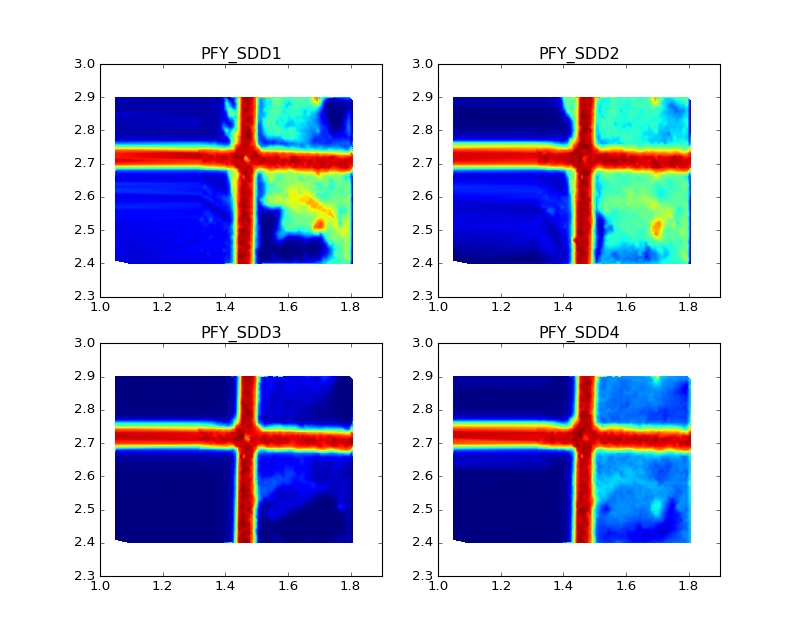

C:\Users\hanr\GitHub\SGMPy\data/map_example_23_pfy_sdd1_2.tiff


In [10]:
matplotlib.rcParams['figure.figsize'] = (10, 8)
single_map.plotpfyGridc(file_directory, 1000, 0.5)